## Model 1 - Predicting Total Sales Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_excel('../data/raw/Adidas US Sales Datasets.xlsx')
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [3]:
# checking the Missing values
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [5]:
data.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [6]:
# We are going to remove some unnecessary columns so that our models will work perfectly.

In [7]:
data = data.drop(columns=["Retailer ID", "Operating Margin"], errors = 'ignore')

In [8]:
data.columns

Index(['Retailer', 'Invoice Date', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Sales Method'],
      dtype='object')

In [9]:
data = data.drop(columns=["Invoice Date"], errors = 'ignore')

In [10]:
cat_cols = data.select_dtypes(include=['object']).columns

In [11]:
cat_cols

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method'], dtype='object')

In [12]:
for col in cat_cols:
    frequency = data[col].value_counts()/len(data)
    data[col] = data[col].map(frequency)

In [13]:
data.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,0.273321,0.246269,0.037313,0.022388,0.166874,50.0,1200,600000.0,300000.0,0.180348
1,0.273321,0.246269,0.037313,0.022388,0.166874,50.0,1000,500000.0,150000.0,0.180348
2,0.273321,0.246269,0.037313,0.022388,0.166667,40.0,1000,400000.0,140000.0,0.180348
3,0.273321,0.246269,0.037313,0.022388,0.166459,45.0,850,382500.0,133875.0,0.180348
4,0.273321,0.246269,0.037313,0.022388,0.166459,60.0,900,540000.0,162000.0,0.180348


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Retailer,9648.0,0.204891,0.071558,0.064884,0.106758,0.246061,0.273321,0.273321
Region,9648.0,0.210849,0.043657,0.126866,0.179104,0.220149,0.253731,0.253731
State,9648.0,0.022611,0.009115,0.014925,0.014925,0.022388,0.022388,0.044776
City,9648.0,0.020383,0.005171,0.014925,0.014925,0.022388,0.022388,0.037313
Product,9648.0,0.166667,0.000169,0.166459,0.166459,0.166667,0.166874,0.166874
Price per Unit,9648.0,45.216625,14.705397,7.000000,35.000000,45.000000,55.000000,110.000000
Units Sold,9648.0,256.930037,214.252030,0.000000,106.000000,176.000000,350.000000,1275.000000
Total Sales,9648.0,93273.437500,141916.016727,0.000000,4254.500000,9576.000000,150000.000000,825000.000000
Operating Profit,9648.0,34425.244761,54193.113713,0.000000,1921.752500,4371.420000,52062.500000,390000.000000
Sales Method,9648.0,0.387224,0.129174,0.180348,0.312915,0.506737,0.506737,0.506737


<Axes: >

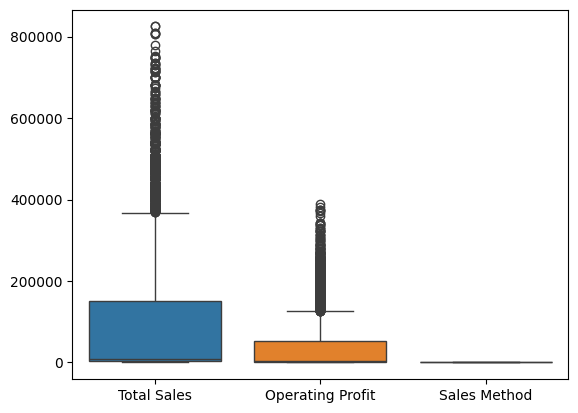

In [15]:
sns.boxplot(data=data[['Total Sales', 'Operating Profit', 'Sales Method']])

In [16]:
# Mathematically we check our daa is skew or not with the help of below function.
data['Operating Profit'].skew()

np.float64(2.2335982483835206)

C:\Users\HP\AppData\Local\Temp\ipykernel_1572\4275393534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Total Sales'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1572\4275393534.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Operating Profit'])


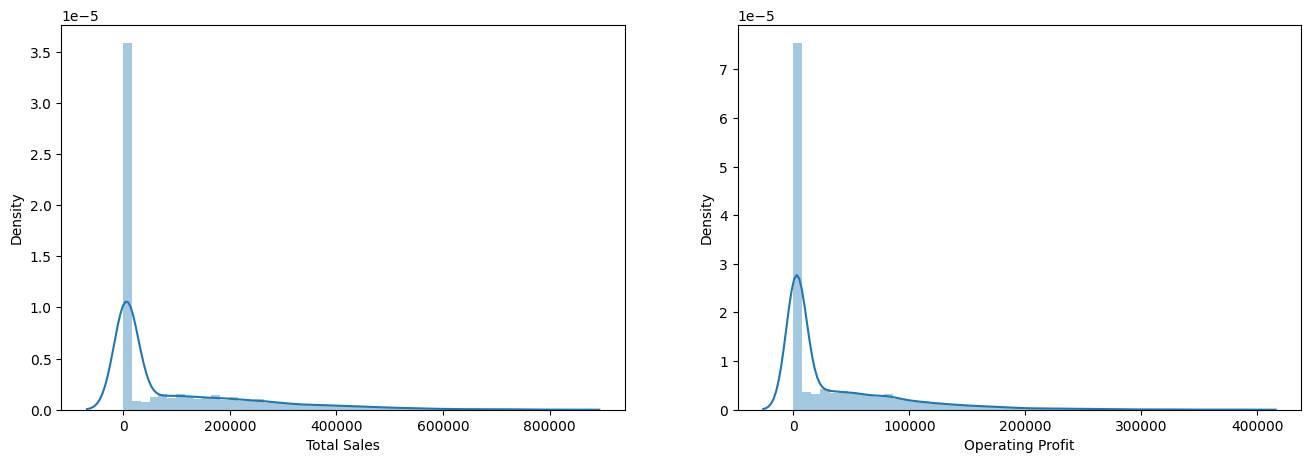

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Total Sales'])
plt.subplot(1,2,2)
sns.distplot(data['Operating Profit'])
plt.show()

In [18]:
#We start removing the outlier with the help of technique called winsorization 
q1 = data["Total Sales"].quantile(0.01)
q99 = data["Total Sales"].quantile(0.99)
data["Total Sales"] = data["Total Sales"].clip(q1, q99)

C:\Users\HP\AppData\Local\Temp\ipykernel_1572\4275393534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Total Sales'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1572\4275393534.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Operating Profit'])


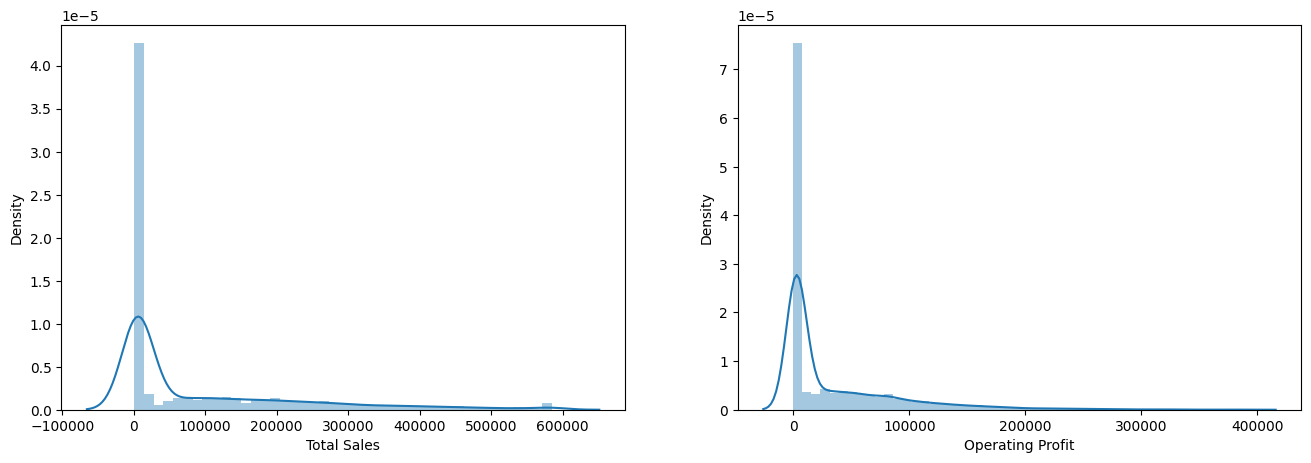

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Total Sales'])
plt.subplot(1,2,2)
sns.distplot(data['Operating Profit'])
plt.show()

In [20]:
data['Log_Total_Sales'] = np.log1p(data['Total Sales'])
data['Log_Operating_Profit'] = np.log1p(data['Operating Profit'])

In [21]:
data.drop(columns=['Total Sales','Operating Profit'],inplace=True)
data.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price per Unit',
       'Units Sold', 'Sales Method', 'Log_Total_Sales',
       'Log_Operating_Profit'],
      dtype='object')

In [22]:
data.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Sales Method,Log_Total_Sales,Log_Operating_Profit
0,0.273321,0.246269,0.037313,0.022388,0.166874,50.0,1200,0.180348,13.279369,12.611541
1,0.273321,0.246269,0.037313,0.022388,0.166874,50.0,1000,0.180348,13.122365,11.918397
2,0.273321,0.246269,0.037313,0.022388,0.166667,40.0,1000,0.180348,12.899222,11.849405
3,0.273321,0.246269,0.037313,0.022388,0.166459,45.0,850,0.180348,12.854487,11.804669
4,0.273321,0.246269,0.037313,0.022388,0.166459,60.0,900,0.180348,13.199326,11.995358


C:\Users\HP\AppData\Local\Temp\ipykernel_1572\4079607932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_Total_Sales'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1572\4079607932.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_Operating_Profit'])


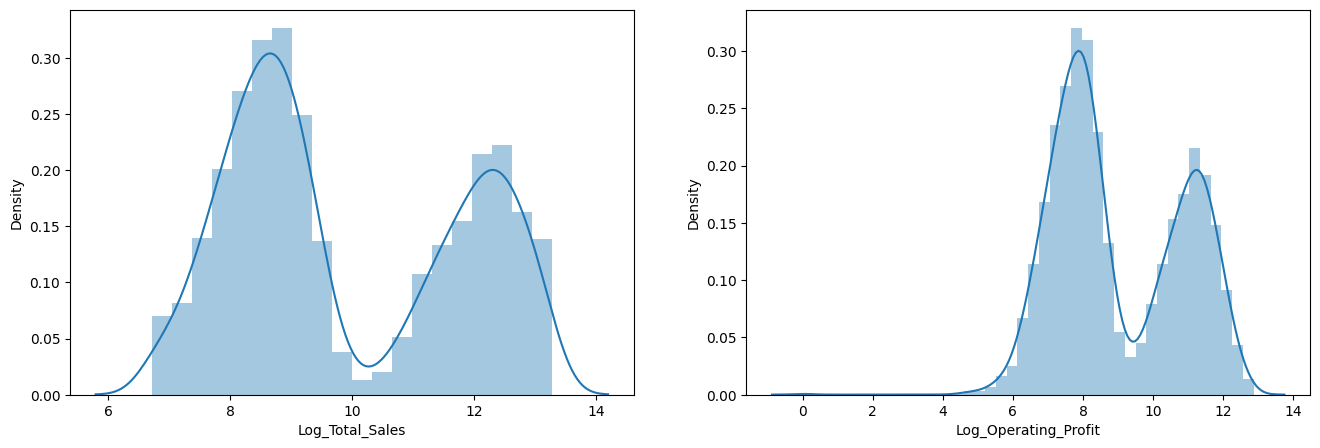

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Log_Total_Sales'])
plt.subplot(1,2,2)
sns.distplot(data['Log_Operating_Profit'])
plt.show()